# Netflix Challenge - Recommendation Systems

The netflix challenge is to build a comprehensive recommendation system taking into account user ratings, movie ratings, choice of users, similarity of items, etc.

### Approach :

The basic approach is splitting the sample set for two metrics - user based similarity, collaborative filtering.

UBS can be calculated by using Cosine Similarity
CF can be caluclated using word embeddings, CNMF, NNMF, SVD and DNN architectures. This solution uses NNMF as a matrix factorization method for recommendation building, normalizing data and then applying feature scaling through the cosine filter.

### Output :

A list of recommended items for a given user _n

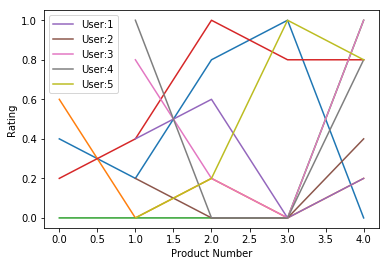


Cosine Similarity : User to User

Cosine similarity for user  1  and user  2  is : 0.47809
Cosine similarity for user  1  and user  3  is : 0.65983
Cosine similarity for user  1  and user  4  is : 0.58435
Cosine similarity for user  1  and user  5  is : 0.28868
Cosine similarity for user  2  and user  3  is : 0.96609
Cosine similarity for user  2  and user  4  is : 0.90796
Cosine similarity for user  2  and user  5  is : 0.55205
Cosine similarity for user  3  and user  4  is : 0.96393
Cosine similarity for user  3  and user  5  is : 0.50000
Cosine similarity for user  4  and user  5  is : 0.38557

Cosine Similarity calculated

CS relevance of user-user : U1 -  1  U2 -  2  Similarity - 0.47809
CS relevance of user-user : U1 -  1  U2 -  3  Similarity - 0.65983
CS relevance of user-user : U1 -  1  U2 -  4  Similarity - 0.58435
CS relevance of user-user : U1 -  1  U2 -  5  Similarity - 0.28868
CS relevance of user-user : U1 -  2  U2 -  3  Similarity - 0.96609
CS relevance of user-user : U

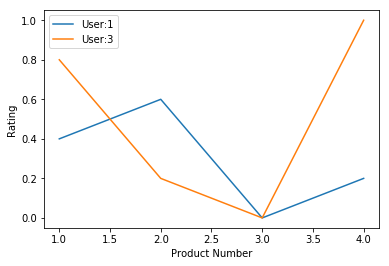

Pearson: (0.10846522890932815, 0.891534771090672)
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.2000      0.271     -0.739      0.488      -0.863       0.463


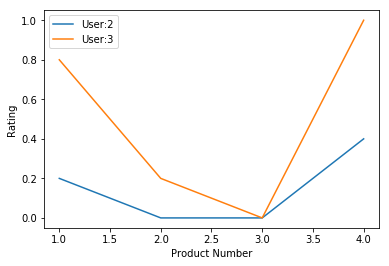

Pearson: (0.9506541513652698, 0.04934584863473025)
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.3500      0.257     -1.364      0.221      -0.978       0.278


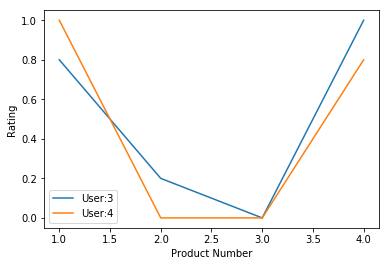

Pearson: (0.9317610191137536, 0.06823898088624637)
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.0500      0.355      0.141      0.893      -0.818       0.918


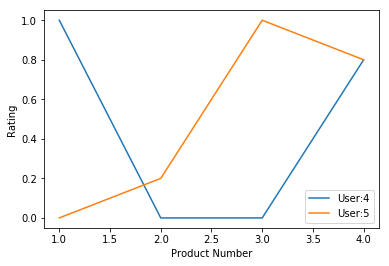

Pearson: (-0.34608266424225126, 0.6539173357577487)
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.0500      0.355     -0.141      0.893      -0.918       0.818
product 3 recommended to user 4
product 1 recommended to user 5


In [37]:
import numpy as np 
import scipy.stats
from scipy import spatial
from operator import itemgetter
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import CompareMeans
import statsmodels.api as sm

#from Data import givenset

#Cosine Similarity function. Then if one item matches it after a recommendation, that very user is recommended to it.
# Each user has been given 4 items to evaluate. User that hasnt evaluated an item rates it '0'. Scale is out of 5.
# R here shows sample data. This can be extracted from any Data module with values.

#sample array
R = np.array([  
    [2, 3, 0, 1],
    [1, 0, 0, 2],
    [4, 1, 0, 5],
    [5, 0, 0, 4],
    [0, 1, 5, 4],  
  ])
r2=[]
for i in R:
    r1=[]
    for j in i:
        r1.append(j/float(5))
    r2.append(r1)
R=np.array(r2)

plt.plot(R)
x=range(1,5)
n=1
for user in R:
    l="User:"+str(n)
    plt.plot(x,user,label=l)
    n+=1
plt.ylabel('Rating')
plt.xlabel('Product Number')
plt.legend()
plt.show()

d={}
for i in range(1,6):
    d[i]=list()

print "\nCosine Similarity : User to User\n"
Ai = []
for i in range(len(R)):
    for j in range(i, len(R)):
        desc= 1-spatial.distance.cosine(R[i],R[j])
        if desc != 1:
            print "Cosine similarity for user ",i+1," and user ",j+1," is : %1.5f"%(desc)
            Ai.append([i+1,j+1,desc])
            l=d.get(i+1)
            l.append([i+1,j+1,desc])
            d[i+1]=l
print "\nCosine Similarity calculated\n";totval=0
for item in Ai:
    totval=totval+item[2]
    print "CS relevance of user-user : U1 - ",item[0]," U2 - ",item[1]," Similarity - %1.5f"%(item[2])
print "User-User Similarity : ",totval/len(Ai)

for user in d:
    values=d.get(user)
    if values==list():
        continue
    info=max(values,key=itemgetter(2))
    a=info[0]-1
    b=info[1]-1
    
    x=range(1,5)
    n=a+1
    l="User:"+str(n)
    plt.plot(x,R[a],label = l)
    n=b+1
    l="User:"+str(n)
    plt.plot(x,R[b],label = l)
    plt.ylabel('Rating')
    plt.xlabel('Product Number')
    plt.legend()
    plt.show()
    
    print "Pearson:",scipy.stats.pearsonr(R[a], R[b])

    print(CompareMeans(DescrStatsW(R[a]), DescrStatsW(R[b])).summary())
    
    results = sm.OLS(R[b], R[a]).fit()
    #print(results.summary())
    
    for i in range(0,4):
        if R[a][i]==0:
            if R[b][i]>=0.35:                
                print "product",i+1,"recommended to user",a+1
    for i in range(0,4):
        if R[b][i]==0:
            if R[a][i]>=0.35:
                print "product",i+1,"recommended to user",b+1

In [38]:
import numpy as np 
import math
from sklearn.metrics import mean_squared_error
import Data

#sample data
R = np.array([  
    [2, 3, 0, 1],
    [1, 0, 0, 2],
    [4, 1, 0, 5],
    [5, 0, 0, 4],
    [0, 1, 5, 4],  
  ])
"""R = np.asarray(Data.getdata.getthis())
print R"""
user,item=R.shape
alpha,beta,iterations,K=0.095,0.001,0,2 #alpha and beta are fine tuning parameters

def full_matrix(b,user_bias,item_bias,P,Q): #returns PxQ ;
  return b+user_bias[:,np.newaxis] + item_bias[np.newaxis:,] + P.dot(Q.T)

def sgd(P,Q,samples,b,user_bias,item_bias):
  global alpha
  global beta
  for i,j,r in samples:
    prediction = get_rating(i,j,b,user_bias,item_bias,P,Q)
    e=(r-prediction)

    user_bias[i]+= alpha*(e- beta*user_bias[i])
    item_bias[j]+= alpha*(e- beta*item_bias[j])

    P[i, :] += alpha * (e*Q[j, :] - beta*P[i, :])
    Q[j, :] += alpha * (e*P[i, :] - beta*Q[j, :])

def get_rating(i,j,b,user_bias,item_bias,P,Q): #returns rating
  return b + user_bias[i] + item_bias[j] + P[i, :].dot(Q[j, :].T)

def mse(R,b,b_u,b_i,P,Q):
  xs,ys=R.nonzero()
  predicted = full_matrix(b,b_u,b_i,P,Q); 
  #print predicted
  error = 0; count=0
  """for x,y in zip(xs,ys):
    error+= mean_squared_error(R,predicted)
    print "Square error : ",error"""
  """predicted=full_matrix(b,b_u,b_i,P,Q)
        mean_squared_error(R[x,y],predicted[x,y])"""
  return np.sqrt(mean_squared_error(R,predicted))

def train(R,user,item,K,iterations):
  P=np.random.normal(scale=1./K, size=(user,K))
  Q=np.random.normal(scale=1./K, size=(item,K))
  #user_bias = user bias, item_bias = item bias, b= bias. Bias is set on mean, where R!=0
  user_bias=np.zeros(user)
  item_bias=np.zeros(item)
  b=np.mean(R[np.where(R != 0)])
  samples=[
        (i,j,R[i,j])
        for i in range(user)
        for j in range(item)
        if R[i,j]>0
      ]
  training_process = [] ; totsqr = 0 
  for i in range(iterations):
    np.random.shuffle(samples)
    sgd(P,Q,samples,b,user_bias,item_bias) #stochastic gradient descent
    mean_sq_error=mse(R,b,user_bias,item_bias,P,Q)   #mean square error
    totsqr=mean_sq_error+totsqr
    training_process.append((i,mean_sq_error))
    if (i+1)%10 == 0:
      print "Iteration : ",i+1," error : ",mean_sq_error
  #print "\nFactorized Matrix : \n"
  return training_process, full_matrix(b,user_bias,item_bias,P,Q), totsqr
def normalize(fact_mat,scale):
  biggest , smallest = -float('inf') , float('inf');
  print "\nFactorized Matrix : \n"
  for row in fact_mat:
    for item in row:
      print "%1.5f "%(item),
    print " "
  new_list = []
  for row in fact_mat:
    for item in row:
      if item> biggest:
        biggest=item
      if item < smallest:
        smallest=item
  if biggest > scale or smallest < 0:
    print"\nNormalized matrix : \n"
    for row in fact_mat:
      for item in row:
        item=item/biggest;item=scale*item; item=abs(item)
        new_list.append(item)
  else:
    print "No need to normalize matrix";
  return new_list
trained_model, fact_mat , tsqr = train(R,user,item,K,40)
ans_mat = normalize(fact_mat,5); i = 0;
for row in ans_mat:
  i+=1;
  print "%1.5f "%(row),
  if i>3:
    print " "; i = 0;
print "\nOriginal matrix : \n"
for rows in R:
  for item in rows:
    print "%1.5f "%(item),
  print "  "
print "\nbased on this, items recommended to user : "
#print i,j
for i in range(user):
  for j in range(item):
    if R[i,j] == 0:
      if user*i + j < user*item:
        print "Item ",j+1," for user ",i+1," is recommended with rating ",ans_mat[5*i + j]
      else:
         print "Item ",j+1," for user ",i+1," is recommended with rating ",ans_mat[16]

Iteration :  10  error :  2.2759077026247767
Iteration :  20  error :  2.4290260354793642
Iteration :  30  error :  2.4874442106020562
Iteration :  40  error :  2.504816633772226

Factorized Matrix : 

1.99975  2.99848  4.71933  1.00139   
1.00162  2.12067  4.35441  1.99950   
4.00057  0.99521  5.24414  4.99479   
4.99930  1.97626  5.66237  3.99812   
4.03510  1.01374  4.97764  4.00676   

Normalized matrix : 

1.76583  2.64773  4.16728  0.88425   
0.88446  1.87260  3.84504  1.76560   
3.53259  0.87879  4.63070  4.41051   
4.41450  1.74508  5.00000  3.53043   
3.56309  0.89515  4.39537  3.53806   

Original matrix : 

2.00000  3.00000  0.00000  1.00000    
1.00000  0.00000  0.00000  2.00000    
4.00000  1.00000  0.00000  5.00000    
5.00000  0.00000  0.00000  4.00000    
0.00000  1.00000  5.00000  4.00000    

based on this, items recommended to user : 
Item  3  for user  1  is recommended with rating  4.167279734090965
Item  2  for user  2  is recommended with rating  3.84504459388221